### Loads data and import libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# Load the data from MNIST-5-6-Subset.txt
# Change the path as needed
data_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset.txt"
data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)

# Load the labels from MNIST-5-6-Labels.txt
# Change the path as needed
labels_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset-Labels.txt"
labels = np.loadtxt(labels_file_path)
labels = np.where(labels == 5, -1, 1)
# Assuming you want to visualize the first image
# Change the index as needed
image_index = 0
image_data = data_matrix[image_index]
selected_label = int(labels[image_index])


x_train, y_train = data_matrix[:50], labels[:50]
x_test, y_test = data_matrix[60], labels[60]

# Visualize the image using Matplotlib
# We transpose the image to make the number look upright.
# plt.imshow(image_data.reshape(28,28).transpose(1,0), cmap='gray')
# plt.title(f"Label: {selected_label}")
# plt.axis('off') # Turn off axis
# plt.show()

### Implementing the python function

In [25]:
# def knn(training_points, training_labels,test_point, test_label):
#     distance = np.sum((training_points - test_point)**2, axis=1) # calculate the distance between the test point and all the training points
#     index_sort = np.argsort(distance) # sort the distance and get the index
#     labels_sort = training_labels[index_sort] # sort the labels according to the index
#     error_count = np.sign(np.cumsum(labels_sort)) != np.sign(labels_sort) # get the sign of the sum of the first 5 labels
#     error_count_1 = np.where(error_count == True, 1, 0)
#     #print(distance), print(index_sort), print(labels_sort), print(np.cumsum(labels_sort)), print('---'), print(error_count),
#     #print (training_labels), print(error_count_1)
#     return error_count_1
# knn(x_train, y_train, x_test, y_test)

def knn(training_points, training_labels, test_point, test_label):
  # Convert the labels from {5, 6} to {-1, 1}.
  training_labels = np.where(training_labels == 5, -1, 1)
  test_label = np.where(test_label == 5, -1, 1)

  # Compute the distances between the test point and each training point.
  distances = np.linalg.norm(training_points - test_point, axis=1)

  # Find the K nearest neighbors of the test point.
  nearest_neighbors = np.argsort(distances)
  # [:m]

  # Predict the label of the test point by taking the majority vote of the labels of its K nearest neighbors.
  predicted_label = training_labels[nearest_neighbors]

  sum = np.cumsum(predicted_label)
  sum[sum > 0]=1
  sum[sum <= 0]=-1

  # Compute the error of the prediction.
  error = np.where(sum != test_label, 1, 0)

  return error

knn(x_train, y_train, x_test, y_test)

    

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### Splits the validation sets

In [20]:
'''
data_matrix: the data matrix
i: the validation set
m: is the training points that we want to skip
n: is the number of training points that we want to use

returns: the validation set
'''
def validation_set_split(data_matrix, i, m, n):
    #print(m+(i*n)+1,'-' , m+((i+1)*n))
    return data_matrix[m+(i*n)+1:m+((i+1)*n)]




### Plotting the validation sets

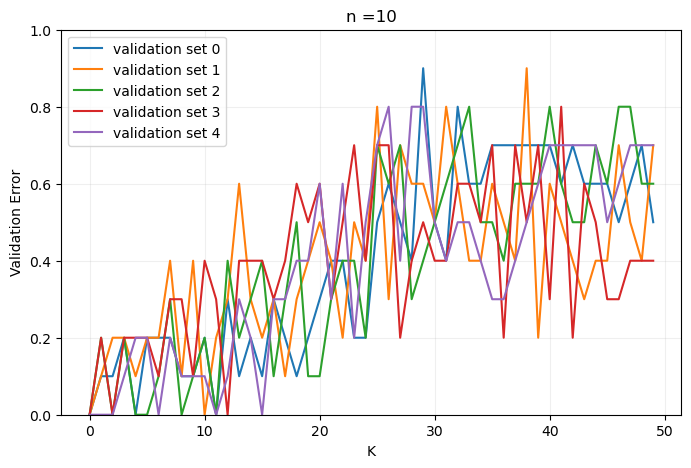

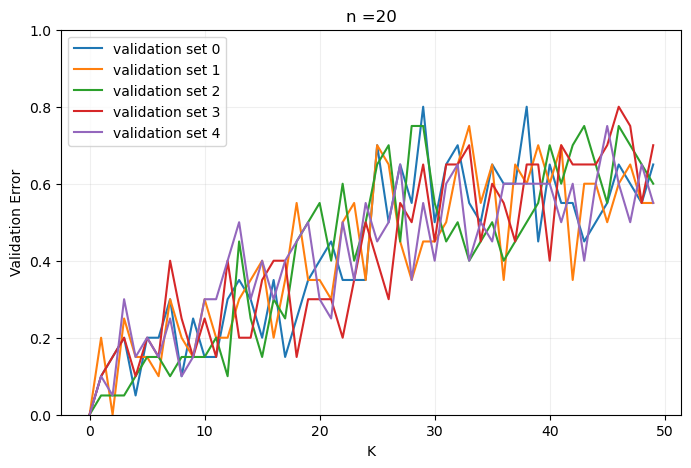

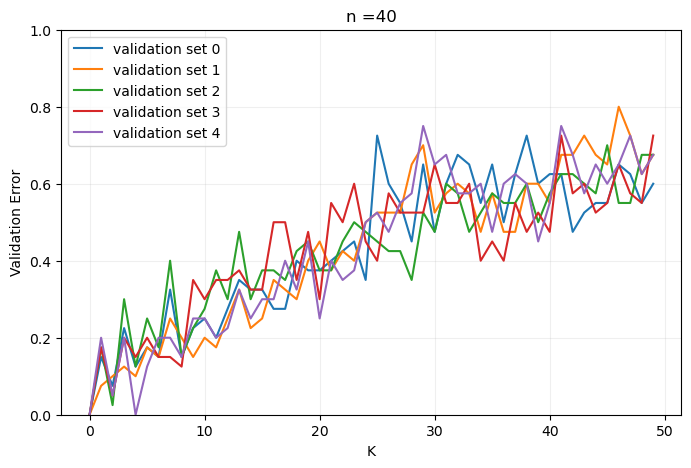

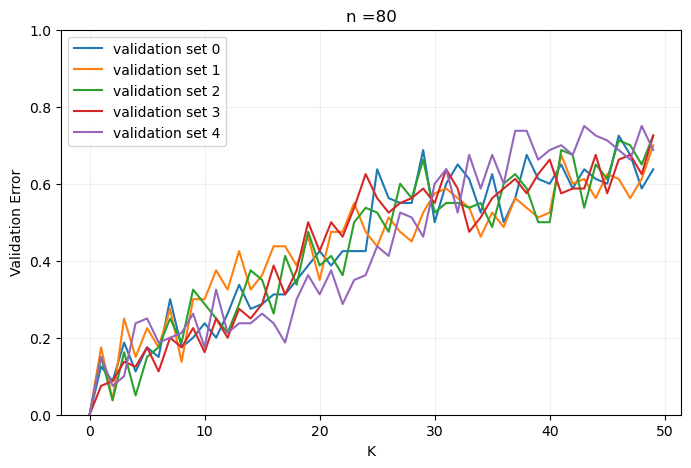

In [21]:

m = 50
lst_n = [10, 20, 40, 80]


for n in lst_n:
    SumList_list = []
    for i in range(5):
        val_x = validation_set_split(data_matrix, i, m, n)
        val_y = validation_set_split(labels, i, m, n)
        SumList = np.zeros(m)
        for a in range(len(val_x)):
            test = knn(x_train, y_train, val_x[a], val_y[a])
            #print(test)
            SumList = (SumList + test)
        SumList = list(map(lambda x: x / n, SumList))
        SumList_list.append(SumList)


    # Dummy data, x and y
    x = np.arange(50)
    y = SumList
    #np.sin(x) + np.random.normal(0, 0.2, len(x))
    # Initialise figure (fig) and axis (ax)
    fig, ax = plt.subplots(figsize=(8,5))
    # Plot in axis, add label to data
    for i in range(len(SumList_list)):
        ax.plot(x, SumList_list[i], label=f'validation set {i}')
        
    # Set labels and title
    ax.set_xlabel('K')
    ax.set_ylabel('Validation Error')
    ax.set_title(f'n ={n}')
    # Add grid
    ax.grid(alpha=0.2)
    # Set axes limit
    #s
    ax.set_ylim(0,1)
    # Add legend (remember to label the data as shown above (*))
    ax.legend()
    # Show plot
    plt.show()
    # Save plot to some local path
    fig.savefig('validation_err.png')





